# Исследование объявлений о продаже квартир

**Задача:** Проанализировать рынок недвижимости в Санкт-Петербурге и в соседних населённых пунктах. Определить рыночную стоимость объектов недвижимости и установить, какие параметры на неё влияют.

**План проекта:**

1. Обзор данных
2. Предобработка данных
    - Пропуски
    - Дубликаты
    - Аномальные значения
    - Создание новых параметров
3. Исследовательский анализ данных
    - Изучение параметров по отдельности
    - Скорость продажи квартир
    - Факторы, влияющие на цену

## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

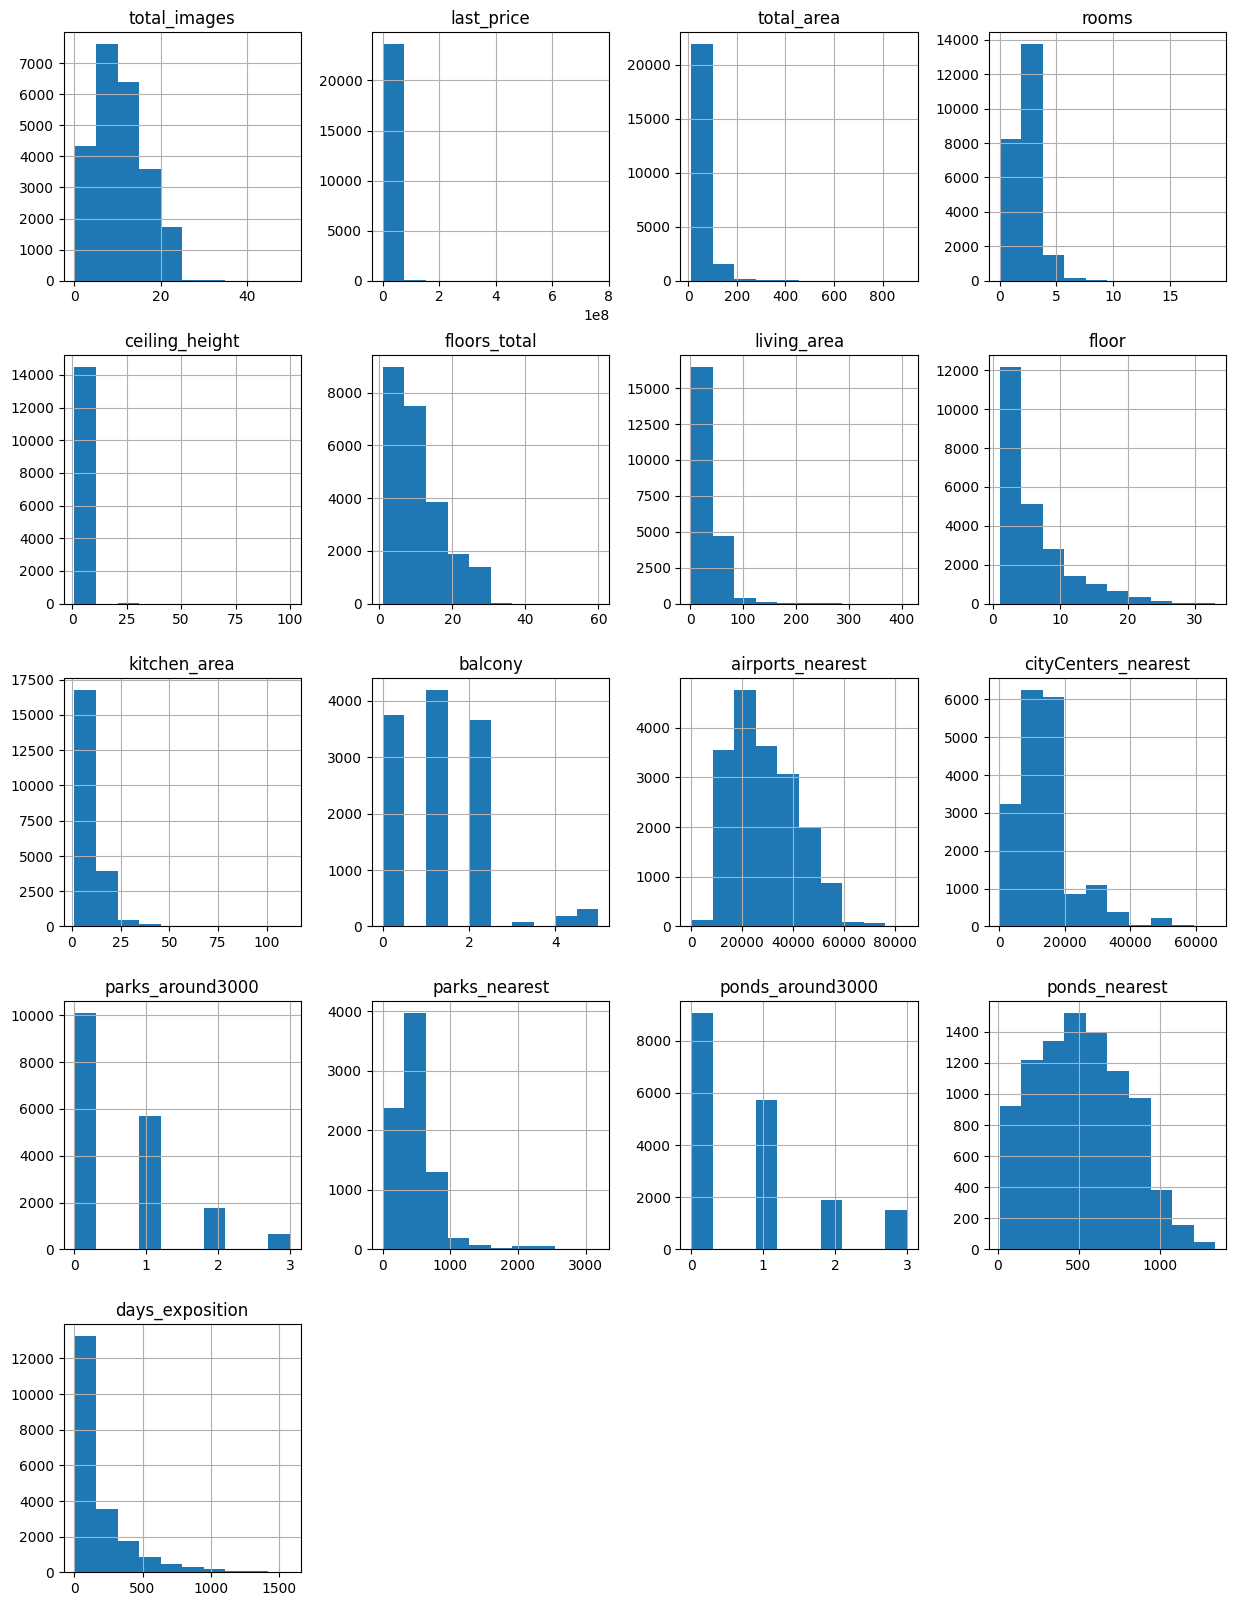

In [4]:
df.hist(figsize=(15, 20));

**Выводы:**

Во многих столбцах есть пропуски. Особено пугающе выглядит "is_apartment", но это на первый взгляд. В тех данных, что проставляла система тоже немало пропусков, при чем сразу во всей строчке. Некоторые данные представлены в некорректном формате. Бросаются в глаза многочисленные нули в цене и там, где должны быть целые значения - "floors_total" и "balcony". Также формат даты, и еще, кажется, нигде не указано время. В принципе, можно сразу сказать, что не ото всех пропусков удастся избавиться. Посмотрим, что можно сделать :)

## Предобработка данных

### Пропуски

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16, grid=True)
            .set_title('Пропуски в данных, %' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

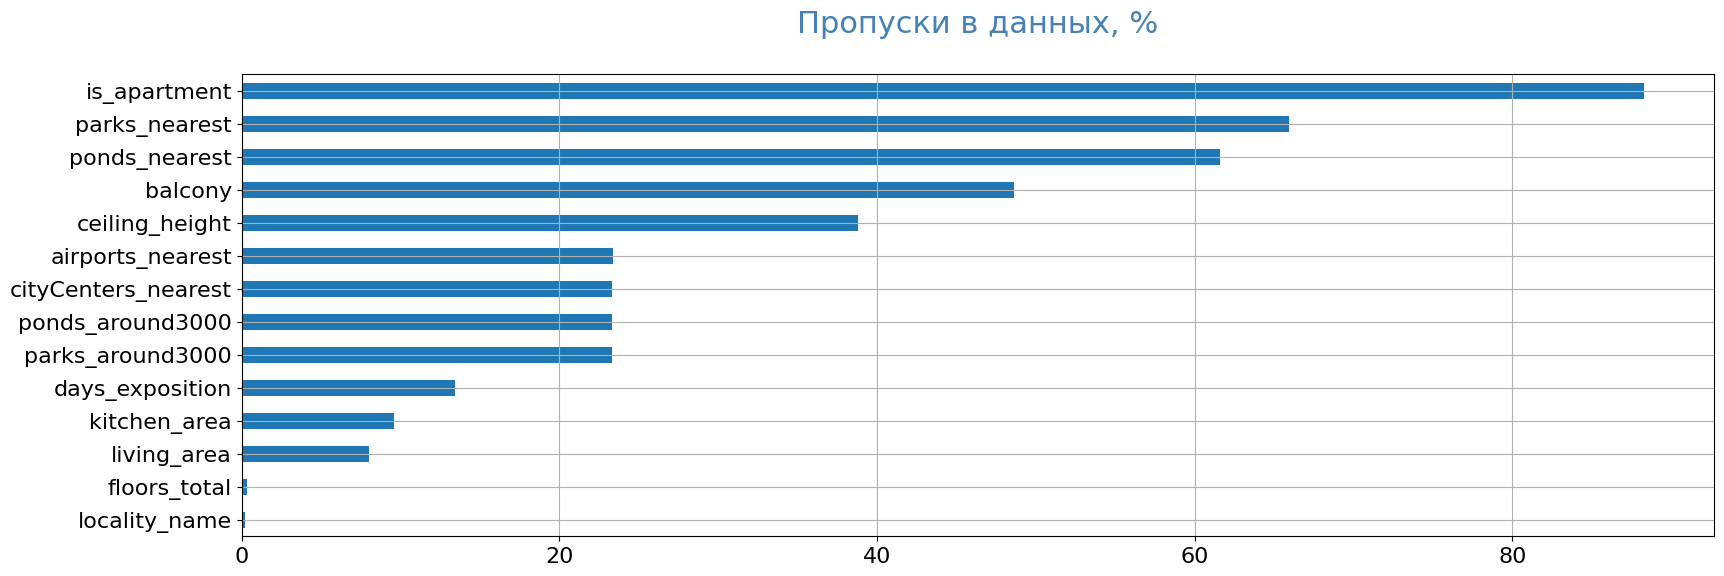

In [7]:
pass_value_barh(df)

**Что будем делать с пропущенными данными:**

1. Самое большое количество пропусков - **is_apartment** - должен быть булевой тип данных, поэтому выбор стоит между False и True. Причина пропусков, очевидно, человеческий фактор. Попробую объяснить, как я это вижу. Проставляя галочки в опроснике на сайте перед публикацией объявления с продажей квартиры, пользователь может выбрать параментр "Апартаменты". Если пользователь знает, что это значит, и если он знает, что именно его квартира - это апартаменты, то он скорее всего отметит "да". Но если пользователь не знает, что значит "апартаменты", он просто пропустит этот параметр, потому что он не обязателен и выставить объявление можно не отмечая его. В таком случае допустим, что на месте пропусков пользователь имеет в виду обычную квартиру, и заменим их на False.

2. **"balcony"** - отсутствие значения скорее всего говорит о том, что в квартире просто нет балконов. Поэтому можно заменить пропуски на нули.

3. Самое минимальное количество пропусков у **"locality_name"** - не знаю, чем можно заменить пропуски, сложно понять почему они вообще появились. Так как их совсем немного, считаю, что можно удалить строчки с ними.

4. **ceiling_height** - можно заменить на медиану в зависимости от этажности зданий, так как застройка в каком-то конкретном районе Питера и его окресностей - это штамповка одинаковых многоэтажек. Высота потолков должна различаться по городам, особено в сравнении с самим Питером, где как известно высокие потолки были нормой. Думаю, это еще зависит от типа населенного пункта - городской поселок, деревня, село и пр.

5. **floors_total** - цифра не должна быть больше 25-30 этажей в ЖК - это мое личное наблюдение, когда жила в СПб. Нужно ближе посмотреть на данные, чтобы понять, что делать с пропусками.

6. **living_area** и **kitchen_area** - по сути, они должны быть связаны. Плюс у нас есть общая жилпощадь. Можно задать примерное соотношение площади кухни и жилой площади, основываясь на средних значениях известных нам данных.

7. Картографические данные, автоматически заполненные системой - все еще большой вопрос как справиться с пропусками в этих данных. Количество парков и водоемов в радиусе 3000 м заполним нулями, скорее всего их просто нет. Остальные показатели, наверное, придется оставить без изменений.

8. **days_exposition** - тоже заполняется автоматически. Почему возникли пропуски? Может ли быть, что объявление не было снято с продажи? Некорректно будет заполнить пропуски медианой, средним или нулями. Оставлю как есть.

In [8]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [10]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [11]:
df['balcony'] = df['balcony'].fillna(0)

In [12]:
df.dropna(subset=['locality_name'], inplace=True)

In [13]:
df['floors_total'].value_counts()

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [14]:
(
df.pivot_table(index='locality_name', values='floors_total', aggfunc='max')
    .sort_values(by='floors_total', ascending=False)
)

,floors_total
locality_name,
Кронштадт,60.0
Санкт-Петербург,52.0
посёлок Парголово,29.0
посёлок Мурино,28.0
поселок Бугры,27.0
...,...
деревня Вахнова Кара,2.0
деревня Каськово,1.0
поселок Пчевжа,1.0


Судя по таблице с общим количеством этажей в домах, в Кранштаде есть дом в 60 этажа, что не может быть правдой. Да и в Питере 52 этажа может быть разве, что у БЦ. Пропусков мало, поэтому проще будет их удалить.

In [15]:
df.dropna(subset=['floors_total'], inplace=True)

In [16]:
df['ceiling_height'].value_counts()

2.50     3515
2.60     1645
2.70     1571
3.00     1108
2.80      988
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [17]:
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [18]:
height_errors_max = df['ceiling_height'].loc[df['ceiling_height'] > 4]
height_errors_max.value_counts()

4.20      10
27.00      8
4.50       7
25.00      7
4.10       3
4.40       3
8.00       3
4.19       2
4.45       2
4.70       2
5.30       2
32.00      2
4.15       1
4.14       1
5.80       1
5.60       1
8.30       1
5.20       1
6.00       1
10.30      1
100.00     1
4.30       1
4.37       1
14.00      1
26.00      1
4.25       1
24.00      1
4.65       1
4.80       1
22.60      1
5.50       1
20.00      1
5.00       1
4.90       1
27.50      1
4.06       1
Name: ceiling_height, dtype: int64

Среднее и медиана высоты потолков приблизительно равны, значит выбросов не так много. Заменим все показатели больше 20 на те же, только сдвинем точку влево. В данных остаются такие аномалии, как 100 м потолок и такие, где высота меньше 2 м.

In [19]:
df.loc[(df['ceiling_height'] >= 20) & (df['ceiling_height'] < 100), 'ceiling_height'] = \
df.loc[(df['ceiling_height'] > 20) & (df['ceiling_height'] < 100), 'ceiling_height'] / 10

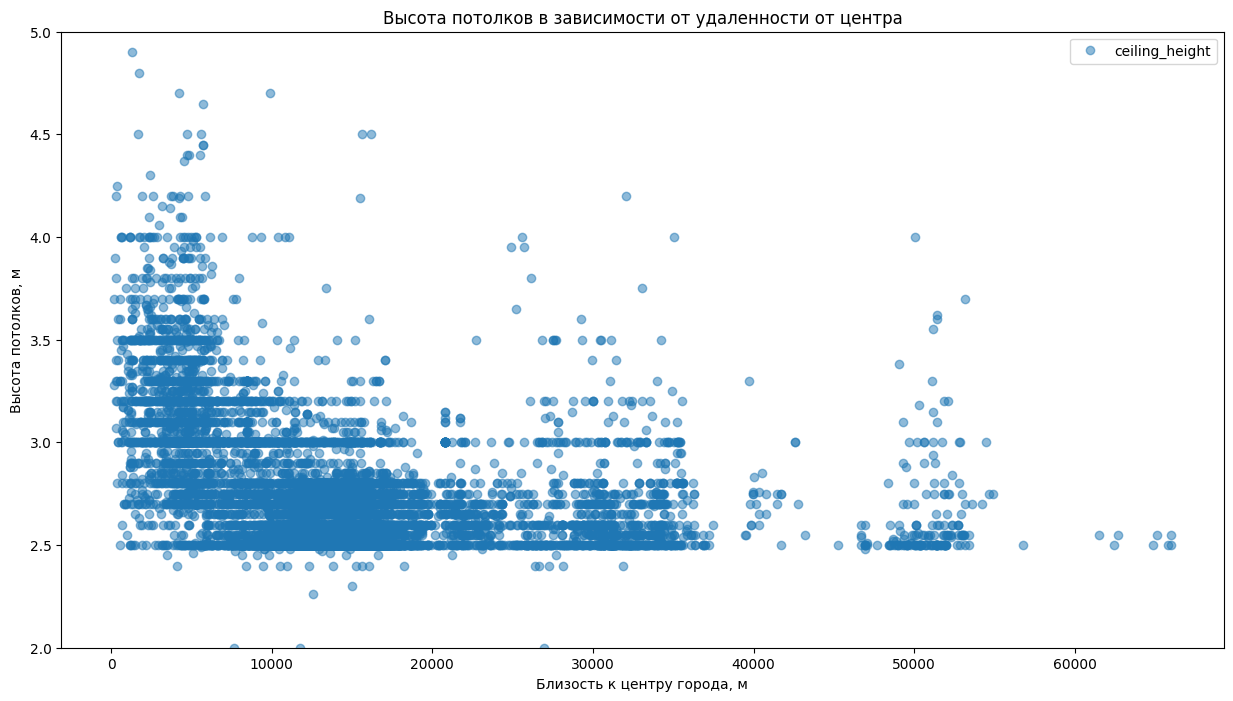

In [21]:
df.plot(x='cityCenters_nearest', y='ceiling_height', style='o', alpha=0.5, figsize = (15,8))
plt.title('Высота потолков в зависимости от удаленности от центра')
plt.xlabel('Близость к центру города, м')
plt.ylabel('Высота потолков, м')
plt.ylim(2,5)
plt.show()

В раудиусе примерно 6 км можно встретить действительно высокие потолки. Всё, что дальше похоже на аномалии. Также очевидно аномалии потолки ниже 2,5 м, хотя допустим, что есть незначительное число квартир с потолками от 2 до 2,5 м.

In [22]:
# заполним пропуски 
df['ceiling_height'] = df.groupby(['locality_name', 'floors_total'])['ceiling_height'].fillna(df['ceiling_height'].median())

In [23]:
df['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [24]:
df['kitchen_area'].describe()

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [25]:
# рассчитаем соотношение средней площади кухни к общей площади и соотношение средней жилплощади к общей площади
ratio_living_to_total = df['living_area'].mean() / df['total_area'].mean()
ratio_kitchen_to_total = df['kitchen_area'].mean() / df['total_area'].mean()

# заполним пропуски
df['living_area'] = df['living_area'].fillna(df['total_area'] * ratio_living_to_total)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * ratio_kitchen_to_total)

In [26]:
# проверка на корректность
values_for_check = df['total_area']*0.9 <= (df['living_area'] + df['kitchen_area'])
values_for_check.value_counts()

False    22908
True       657
dtype: int64

In [27]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [28]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Дубликаты

Посмотрим на уникальные значения в **"locality_name"**, где точно есть неявные дубликаты. Эту информацию пользователи вводили сами, поэтому есть разница в номенклатуре. Выведем все уникальные значения, потом напишем функцию, которая поможет избавиться от не нужных слов и сохраним результат в новый столбец.

In [29]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [30]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

types_in_locality_name = [
    'поселок ', 'городского типа ', 'село ', 'деревня ', 
    'городской ', 'садовое ', 'товарищество ', 'садоводческое некоммерческое ', 
    'коттеджный ', 'при железнодорожной ', 'станции ']

def delite_words(row):
    for t in types_in_locality_name:
        if t in row:
            row = row.replace(t, '')
    return row

df['new_locality_name'] = df['locality_name'].apply(delite_words)

# проверим, что получилось
df.head(10)
df['new_locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [31]:
df.duplicated().sum()

0

Явных дубликатов в данных нет. 

### Тип данных

Поменяем тип данных у даты, так как для нее должен быть установлен специальный тип. Остальные просто выглядят некрасиво, поэтому и их подправим. Для удобства переведем цену в тыс.р.

In [32]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

change_type = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']

for col in change_type:
    df[col] = df[col].astype('int')

df['last_price'] = df['last_price'] / 1000

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Аномалии

In [34]:
# сохраним копию df до фильтрации, чтобы потом оценить процент удаленных данных
old_df = df.copy()

In [35]:
(
        df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
              'floor', 'floors_total']]
        .apply (['count', 'min', 'max', 'median'])   
        .style.format("{:,.2f}")
 )

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,565.00","23,565.00","23,565.00","20,394.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00"
min,0.00,12.00,1.00,1.00,12.19,2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,95.00,"4,646.00",30.00,9.00,4.00,9.00


In [36]:
(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.40,3.00,561.38,9.29,3.03,1.00,2.00
0.01,1.00,25.32,2.50,4.00,"1,000.00",13.00,4.38,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,646.00",30.00,9.00,4.00,9.00
0.99,5.00,197.45,3.60,"1,067.14","36,000.00",122.00,35.54,23.00,26.00
0.9988,8.00,380.00,4.44,"1,370.64","124,856.06",229.58,63.73,26.00,35.00


In [37]:
df['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

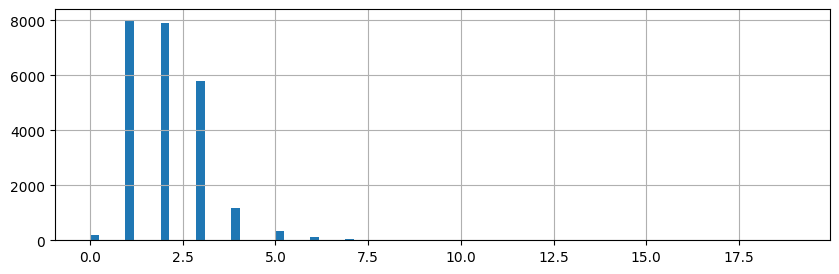

In [38]:
df['rooms'].hist(bins = 80, figsize = (10,3));

Для rooms настроим фильтр в пределах от 1 до 7 комнат

In [39]:
df = df.query('rooms<7')

In [40]:
df = df.query('20<total_area<250')

In [41]:
df['ceiling_height'].value_counts()

2.65    9688
2.50    3518
2.60    1643
2.70    1574
3.00    1094
        ... 
2.89       1
4.80       1
6.00       1
3.48       1
4.45       1
Name: ceiling_height, Length: 170, dtype: int64

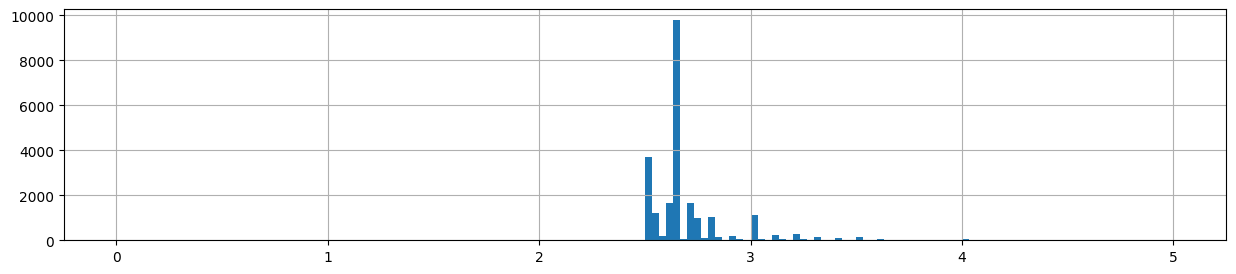

In [42]:
df['ceiling_height'].hist(bins=150, figsize=(15, 3), range=(0, 5));

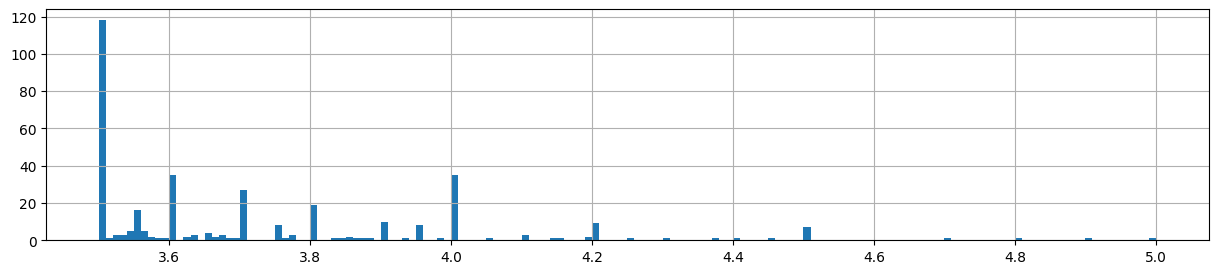

In [43]:
df['ceiling_height'].hist(bins=150, figsize=(15, 3), range=(3.5, 5));

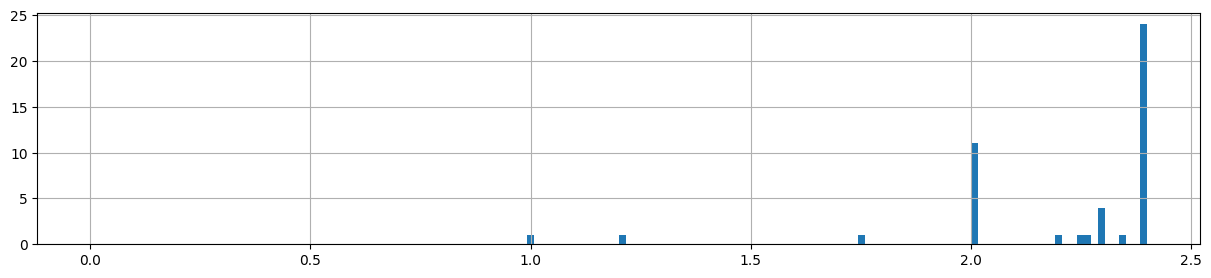

In [44]:
df['ceiling_height'].hist(bins=150, figsize=(15, 3), range=(0, 2.4));

Высота потолков обрезаем на 2,4 и 4

In [45]:
df = df.query('2.4<ceiling_height<4')

In [46]:
df['days_exposition'].value_counts()

45.0      869
60.0      536
7.0       230
30.0      206
90.0      192
         ... 
818.0       1
969.0       1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1133, dtype: int64

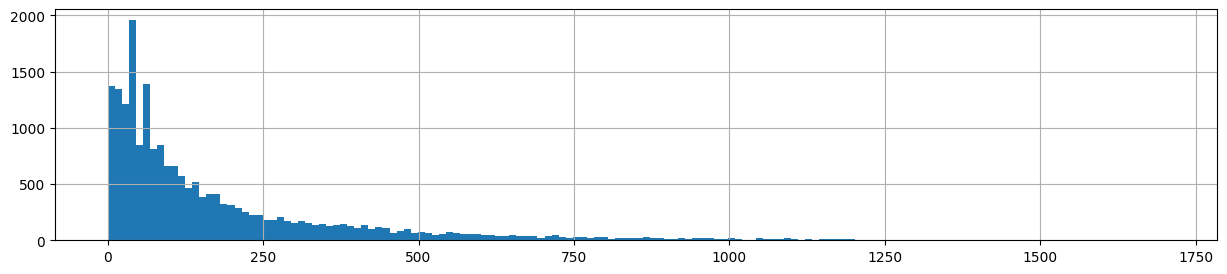

In [47]:
df['days_exposition'].hist(bins=150, range=(0, 1700), figsize=(15, 3));

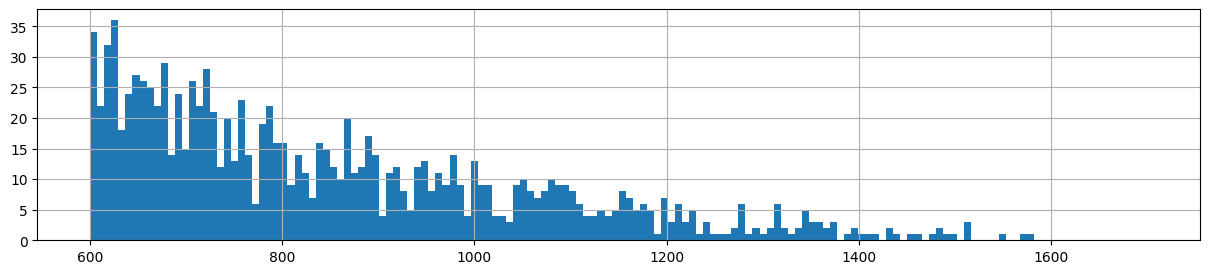

In [48]:
df['days_exposition'].hist(bins=150, range=(600, 1700), figsize=(15, 3));

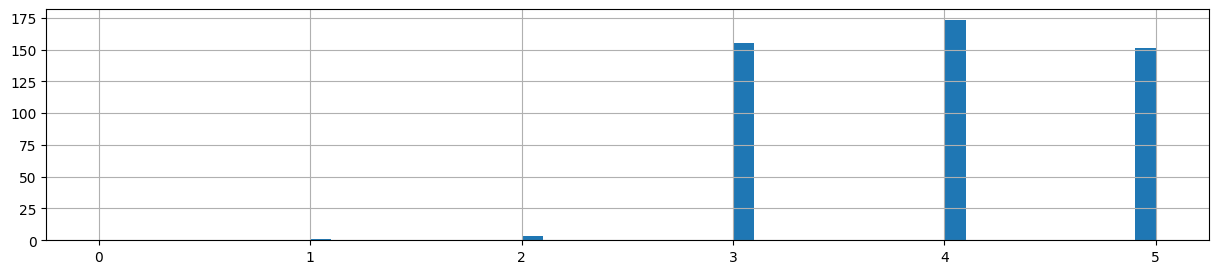

In [49]:
df['days_exposition'].hist(bins = 50, figsize = (15,3), range = (0,5));

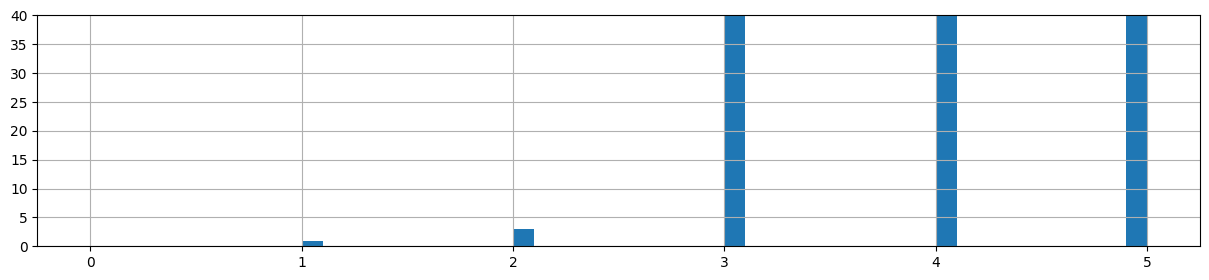

In [50]:
df['days_exposition'].hist(bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

Значения меньше 3 и больше 1000 удаляем

In [51]:
df = df.query('(2<days_exposition<1000) or (days_exposition.isna())')

In [52]:
df['last_price'].value_counts()

4500.000    340
3500.000    286
4300.000    259
4000.000    259
3600.000    253
           ... 
8589.000      1
6084.227      1
2442.000      1
8495.000      1
9699.000      1
Name: last_price, Length: 2784, dtype: int64

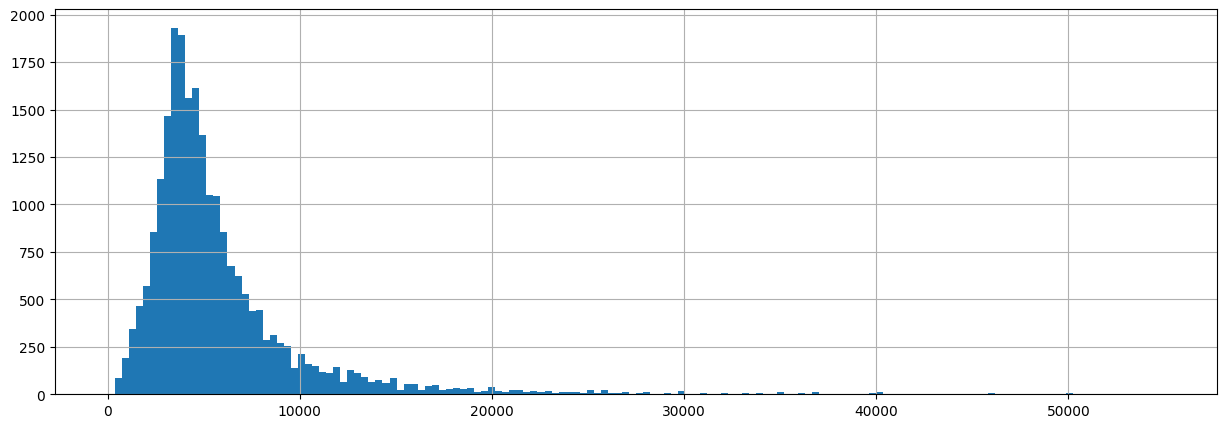

In [53]:
df['last_price'].hist(bins=150, range=(0, 55000), figsize=(15, 5));

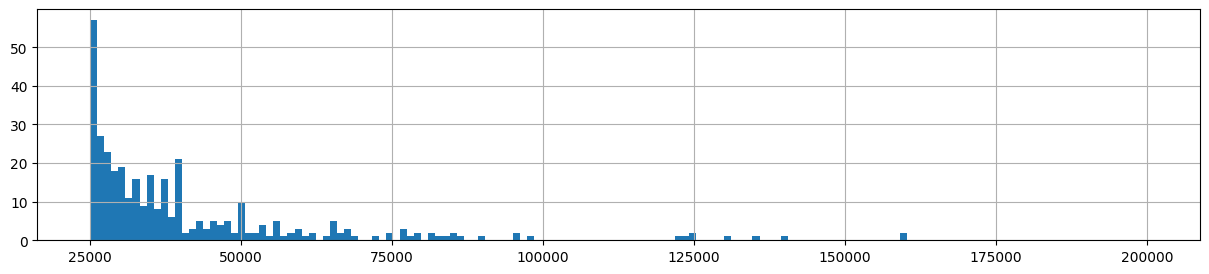

In [54]:
df['last_price'].hist(bins=150, range=(25000, 200000), figsize=(15, 3));

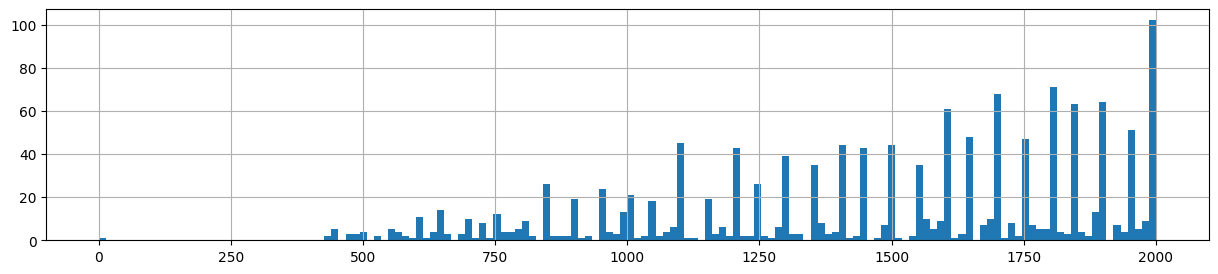

In [55]:
df['last_price'].hist(bins=150, range=(0, 2000), figsize=(15, 3));

Устраним значения меньше 1 млн и больше 50 млн

In [56]:
df = df.query('1000<last_price<50000')

In [57]:
df['living_area'].value_counts()

18.000000    858
17.000000    648
30.000000    575
20.000000    466
16.000000    465
            ... 
59.173614      1
35.770000      1
96.400000      1
50.260000      1
16.740000      1
Name: living_area, Length: 2221, dtype: int64

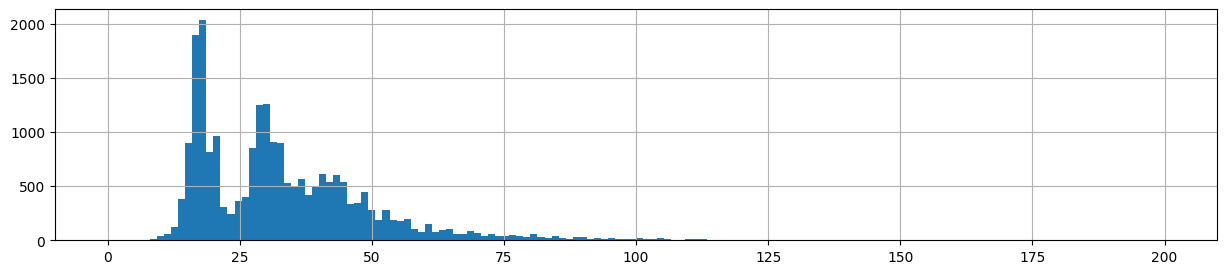

In [58]:
df['living_area'].hist(bins=150, figsize=(15, 3), range=(0, 200));

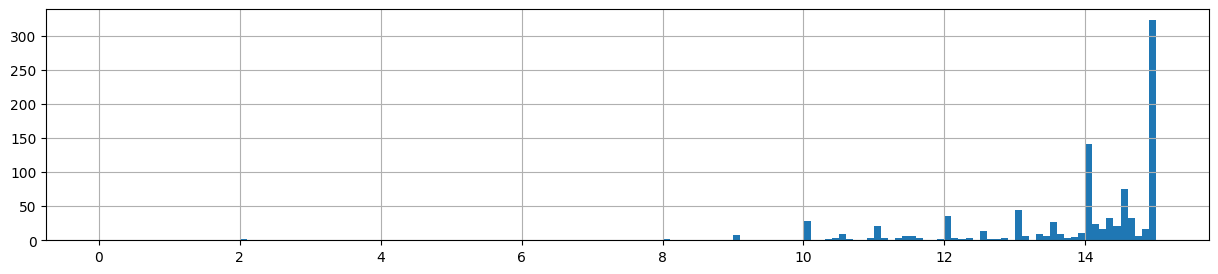

In [59]:
df['living_area'].hist(bins=150, figsize=(15, 3), range=(0, 15));

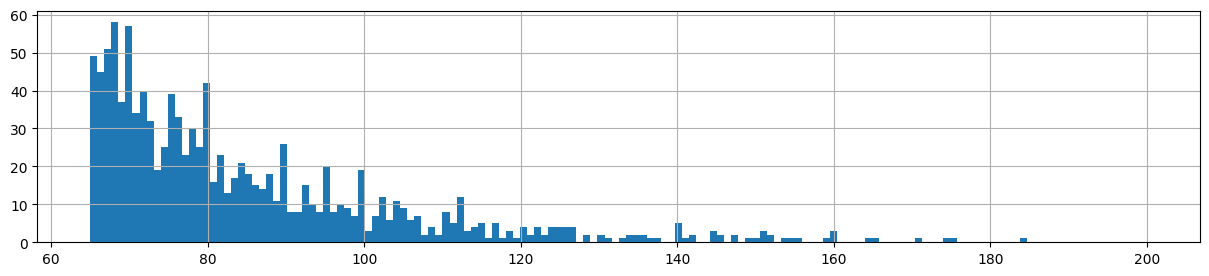

In [60]:
df['living_area'].hist(bins=150, figsize=(15, 3), range=(65, 200));

Устраним значения меньше 13 и больше 120

In [61]:
df = df.query('13<living_area<120')

In [62]:
df['kitchen_area'].value_counts()

10.00    1226
6.00     1223
8.00     1069
9.00     1046
7.00     1032
         ... 
37.78       1
15.72       1
13.73       1
14.74       1
29.30       1
Name: kitchen_area, Length: 1528, dtype: int64

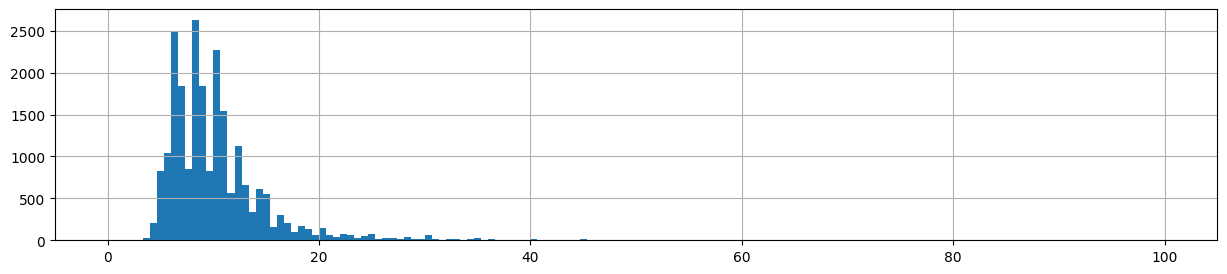

In [63]:
df['kitchen_area'].hist(bins=150, figsize=(15, 3), range=(0, 100));

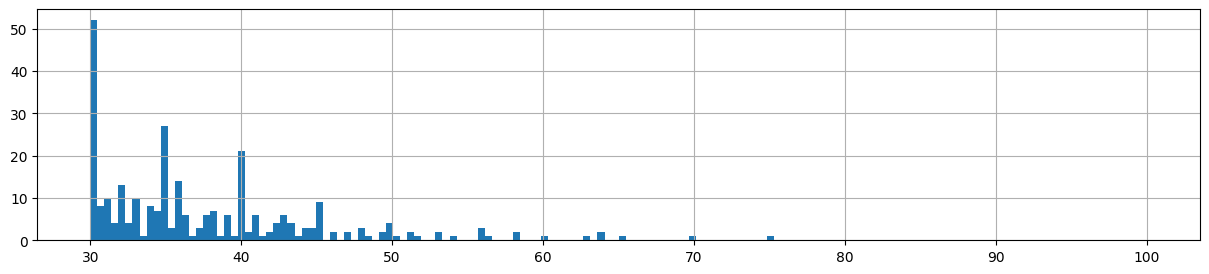

In [64]:
df['kitchen_area'].hist(bins=150, figsize=(15, 3), range=(30, 100));

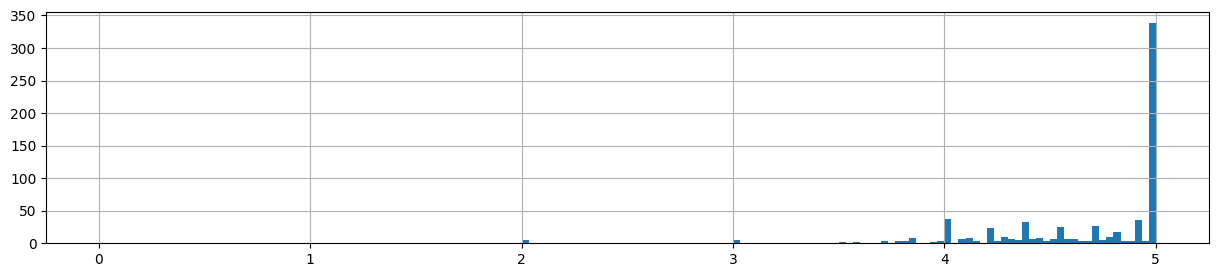

In [65]:
df['kitchen_area'].hist(bins=150, figsize=(15, 3), range=(0, 5));

Сохраним значения в диапазоне от 4 до 50

In [66]:
df = df.query('4<kitchen_area<50')

In [67]:
df['floors_total'].value_counts()

5     5387
9     3664
16    1335
12    1329
10    1135
4     1094
25    1052
17     810
6      792
3      596
14     534
7      533
18     480
24     446
15     355
8      341
23     332
19     308
2      303
22     272
20     260
13     216
11     190
27     154
21     147
26     118
35      24
28      21
1       17
36       3
34       1
60       1
29       1
33       1
Name: floors_total, dtype: int64

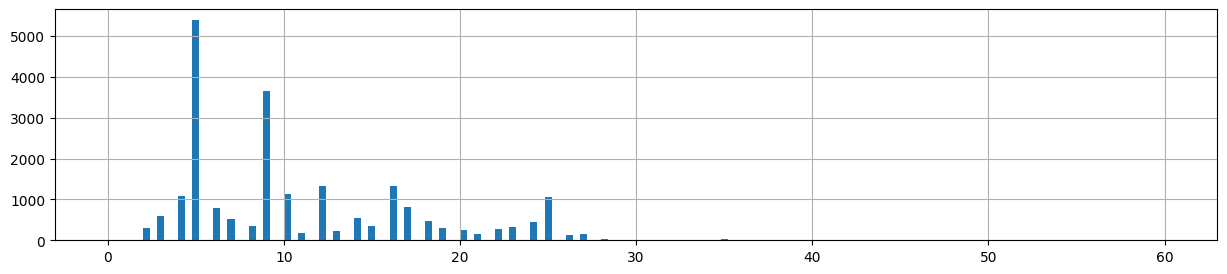

In [68]:
df['floors_total'].hist(bins=150, figsize=(15, 3), range=(0, 60));

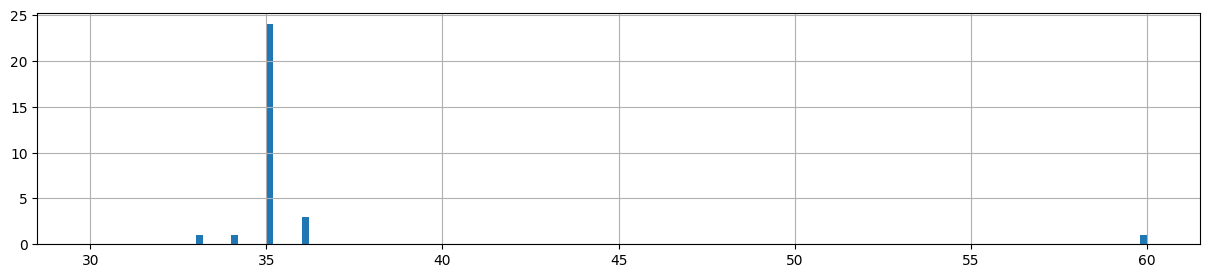

In [69]:
df['floors_total'].hist(bins=150, figsize=(15, 3), range=(30, 60));

Сохраним диапазон значений от 1 до 36

In [70]:
df = df.query('rooms<36')

In [71]:
# проверим, сколько данных было удалено
deleted_df = (len(old_df) - len(df)) / len(old_df)
print('Процент удаленных данных: {:,.2%}'.format(deleted_df))

Процент удаленных данных: 5.57%


In [72]:
(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,252.00","22,252.00","22,252.00","19,268.00","22,252.00","22,252.00","22,252.00","22,252.00","22,252.00"
min,0.00,20.67,2.45,3.00,"1,010.00",13.09,4.03,1.00,1.00
max,6.00,240.00,3.98,999.00,"49,900.00",119.90,49.40,33.00,60.00


## Новые столбцы

In [73]:
df['price_per_m2'] = round(df['last_price'] / df['total_area'], 2)

df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

df['cityCenter_km'] = round(df['cityCenters_nearest'] / 1000)

In [74]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

df['floor_category'] = df.apply(floor_category, axis=1)

In [75]:
# посмотрим, что получилось
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,price_per_m2,weekday,month,year,cityCenter_km,floor_category
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,Санкт-Петербург,120.37,3,3,2019,16.0,другой
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,Шушары,82.92,1,12,2018,19.0,первый
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,Санкт-Петербург,92.79,3,8,2015,14.0,другой
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,Санкт-Петербург,100.00,1,6,2018,8.0,другой
5,10,2890.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,NaN,55.0,Янино-1,95.07,0,9,2018,NaN,другой


## Исследовательский анализ данных

### Параметры объектов

#### общая площадь

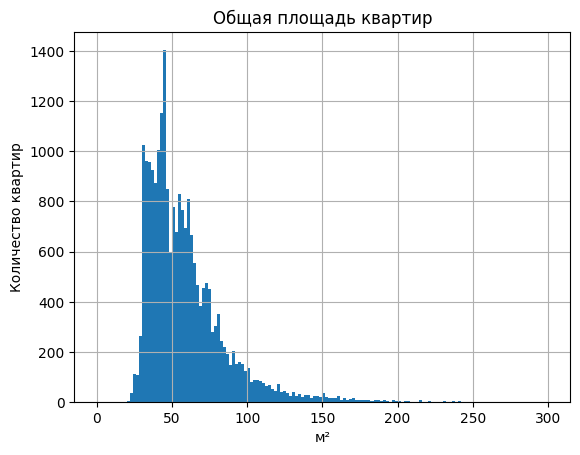

count    22252.000000
mean        57.967714
std         25.441843
min         20.670000
25%         40.100000
50%         52.000000
75%         68.670000
max        240.000000
Name: total_area, dtype: float64

In [76]:
df['total_area'].hist(bins=150, range=(0, 300))
plt.title('Общая площадь квартир')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()
df['total_area'].describe()

Нормальная площадь квартиры в диапазоне от 40 до 69 м²

#### жилая площадь

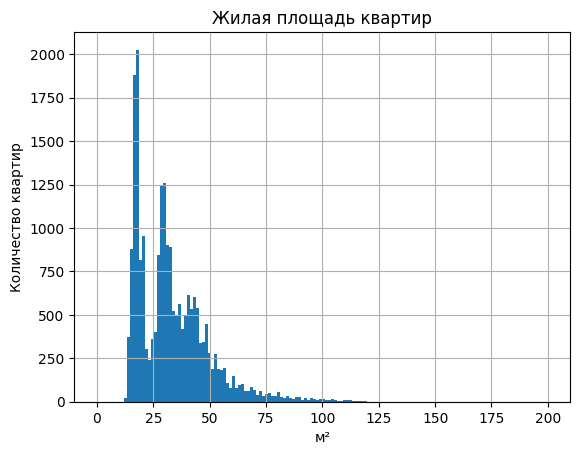

count    22252.000000
mean        33.210887
std         16.370712
min         13.090000
25%         19.000000
50%         30.000000
75%         42.000000
max        119.900000
Name: living_area, dtype: float64

In [77]:
df['living_area'].hist(bins=150, range=(0, 200))
plt.title('Жилая площадь квартир')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()
df['living_area'].describe()

На графике видно три пика - возможно это связано с количеством комнат в квартире. Первый пик такой большой, видимо потому что в него попали площадь 1-комнатных квартир и студий. Средняя жилая площадь 30 м², что вполне похоже на правду.

#### площадь кухни

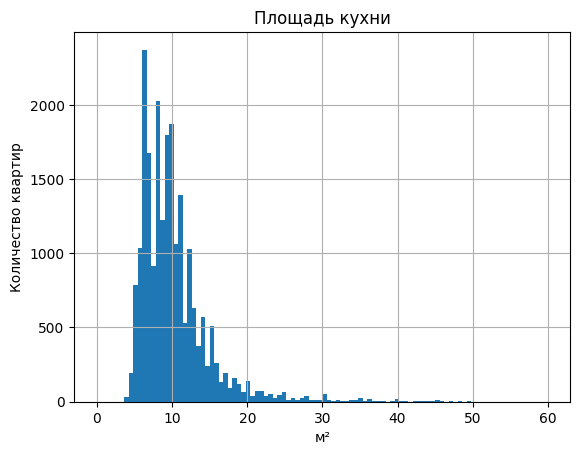

count    22252.000000
mean        10.182887
std          4.856427
min          4.026716
25%          7.000000
50%          9.000000
75%         11.700000
max         49.400000
Name: kitchen_area, dtype: float64

In [78]:
df['kitchen_area'].hist(bins=100, range=(0, 60))
plt.title('Площадь кухни')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()
df['kitchen_area'].describe()

В среднем площадь кухни составляет 9 м².

#### цена объекта

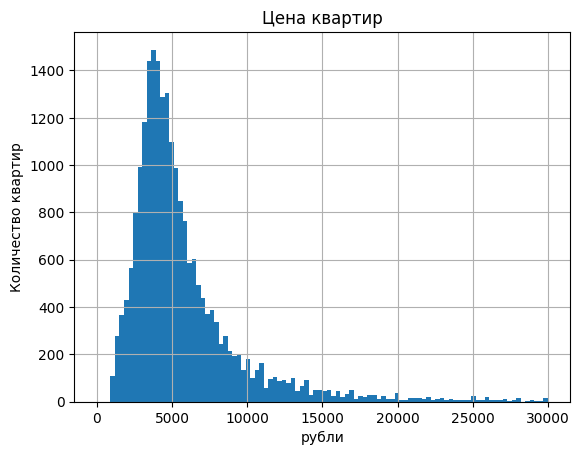

count    22252.000000
mean      5854.560451
std       4440.745108
min       1010.000000
25%       3480.000000
50%       4630.000000
75%       6650.000000
max      49900.000000
Name: last_price, dtype: float64

In [79]:
df['last_price'].hist(bins=100, range=(0, 30000))
plt.title('Цена квартир')
plt.xlabel('рубли')
plt.ylabel('Количество квартир')
plt.show()
df['last_price'].describe()

Квартиру можно купить меньше, чем за 5 млн р - среднее значение и медиана немного разнятся из-за выбросов. 

#### количество комнат

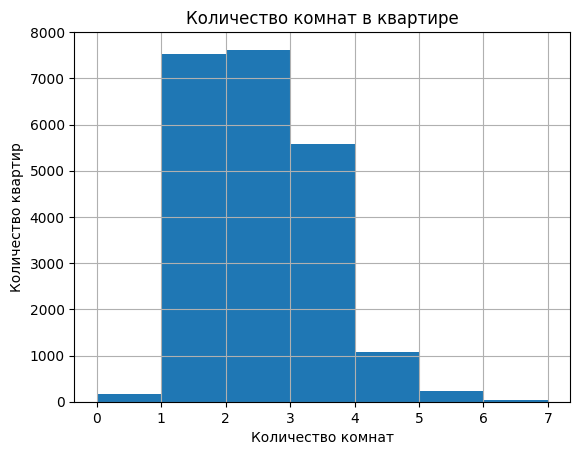

count    22252.000000
mean         2.034514
std          0.969572
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [80]:
df.query('rooms<7')['rooms'].hist(bins=7, range=(0, 7))
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
df['rooms'].describe()

Самое распространенное количество комнат в квартире 2-3, реже можно встретить 4-комнатную квартиру. Больше 5 комнат выглядят как выбросы. Скорее всего это уже отдельные дома, а не многоэтажки.

#### высота потолков

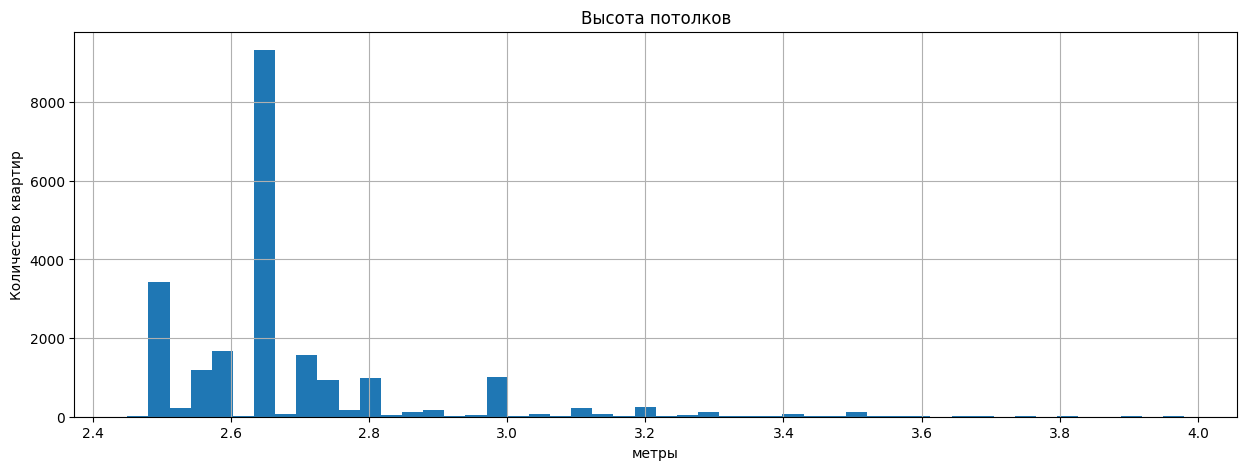

count    22252.000000
mean         2.686828
std          0.189066
min          2.450000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

In [81]:
df['ceiling_height'].hist(bins=50, figsize=(15, 5))
plt.title('Высота потолков')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.show()
df['ceiling_height'].describe()

Самая распространенная высота потолков - чуть больше 2,6 м

#### этаж квартиры

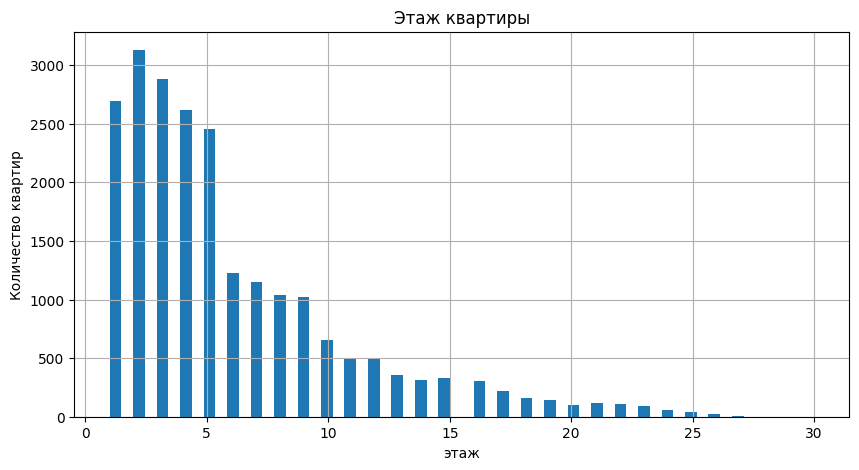

count    22252.000000
mean         5.928815
std          4.885766
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [82]:
df['floor'].hist(bins=60, range=(1, 30), figsize=(10, 5))
plt.title('Этаж квартиры')
plt.xlabel('этаж')
plt.ylabel('Количество квартир')
plt.show()
df['floor'].describe()

Большинство квартир расположено ниже 5 этажа.

#### тип этажа квартиры

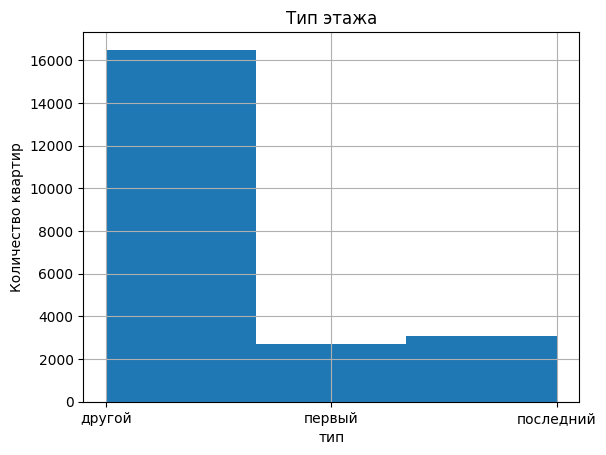

In [83]:
df['floor_category'].hist(bins=3)
plt.title('Тип этажа')
plt.xlabel('тип')
plt.ylabel('Количество квартир')
plt.show()

В большинстве случаев квартира будет не на первом и не на самом последнем этаже.

#### общее количество этажей в доме

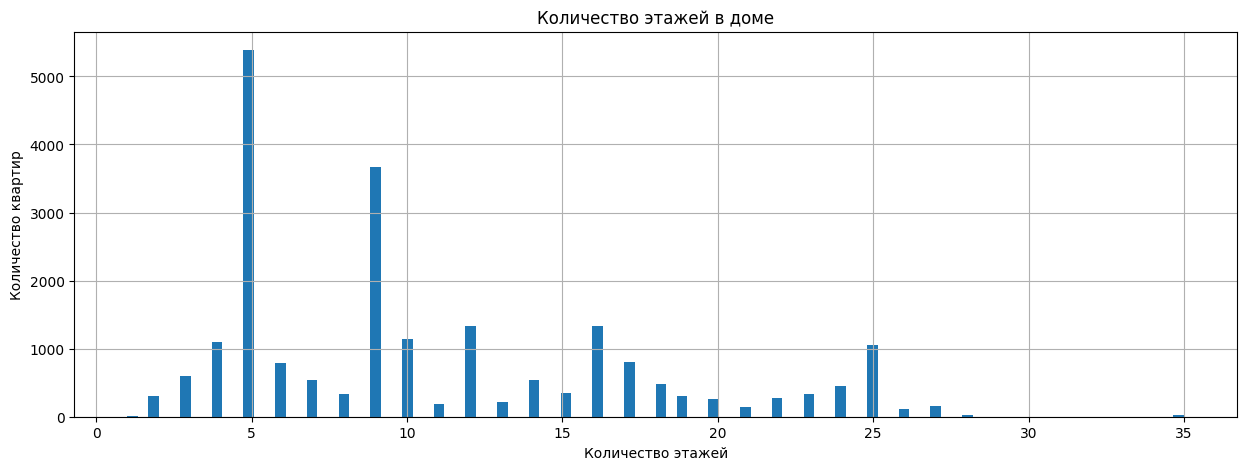

count    22252.000000
mean        10.801591
std          6.589626
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [84]:
df['floors_total'].hist(bins=100, range=(1, 35), figsize=(15, 5))
plt.title('Количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
df['floors_total'].describe()

Пики указывают на самые распространенную этажность - это 5-этажки, 9-этажки и 16-этажки, есть здания в 25 этажей. Правда не думаю, что 5-этажки строятся в таком количестве, это квартиры в старых домах.

#### расстояние до центра города

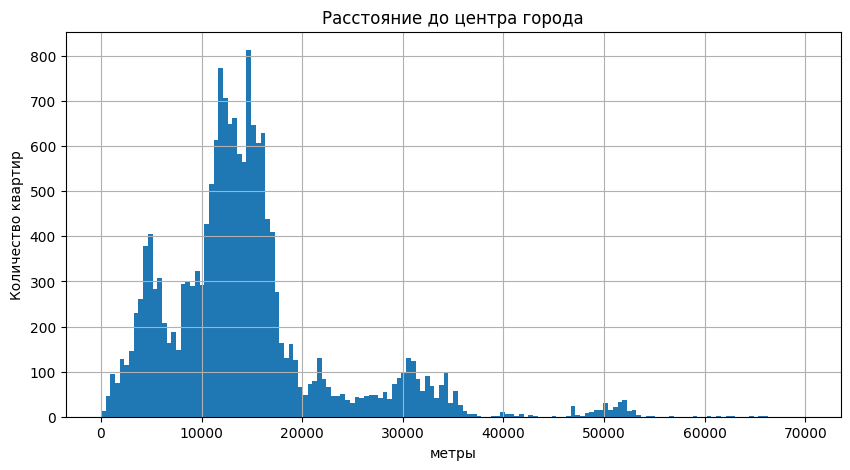

count    17166.000000
mean     14382.554352
std       8535.882851
min        181.000000
25%       9659.000000
50%      13222.000000
75%      16333.000000
max      65952.000000
Name: cityCenters_nearest, dtype: float64

In [85]:
df['cityCenters_nearest'].hist(bins=150, range=(0, 70000), figsize=(10, 5))
plt.title('Расстояние до центра города')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.show()
df['cityCenters_nearest'].describe()

13 км от Питера - судя по всему самая окраина, как до Кудрого и т.д. Достаточно квартир, которые продаются в пределах Питера.

#### расстояние до ближайшего аэропорта

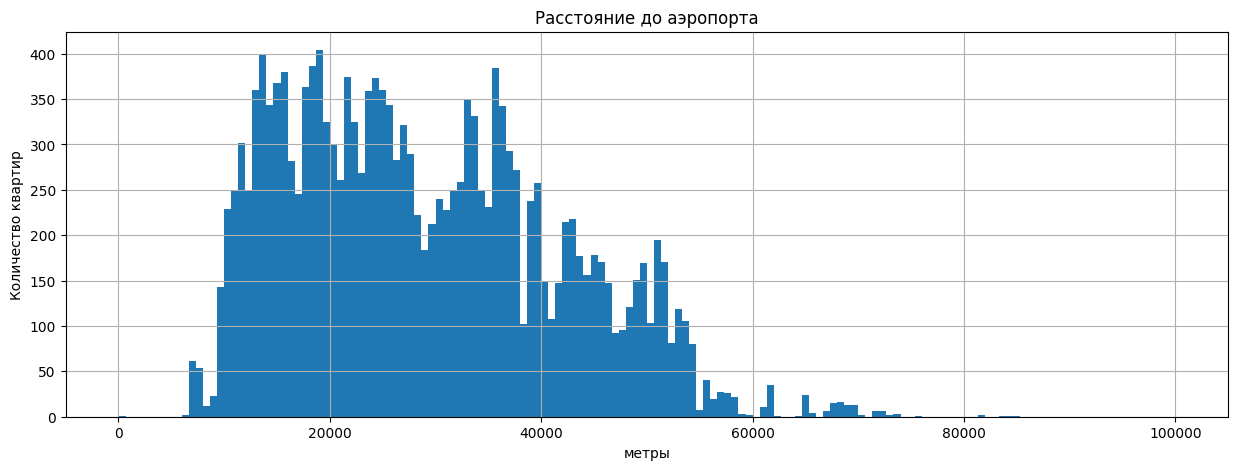

count    17146.000000
mean     28866.588767
std      12713.663170
min          0.000000
25%      18433.500000
50%      26960.000000
75%      37407.000000
max      84853.000000
Name: airports_nearest, dtype: float64

In [86]:
df['airports_nearest'].hist(bins=150, range=(0, 100000), figsize=(15, 5))
plt.title('Расстояние до аэропорта')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.show()
df['airports_nearest'].describe()

Аэропорты располагаются не так близко к квартирам. Растояние примерно 18-40 км.

#### расстояние до ближайшего парка

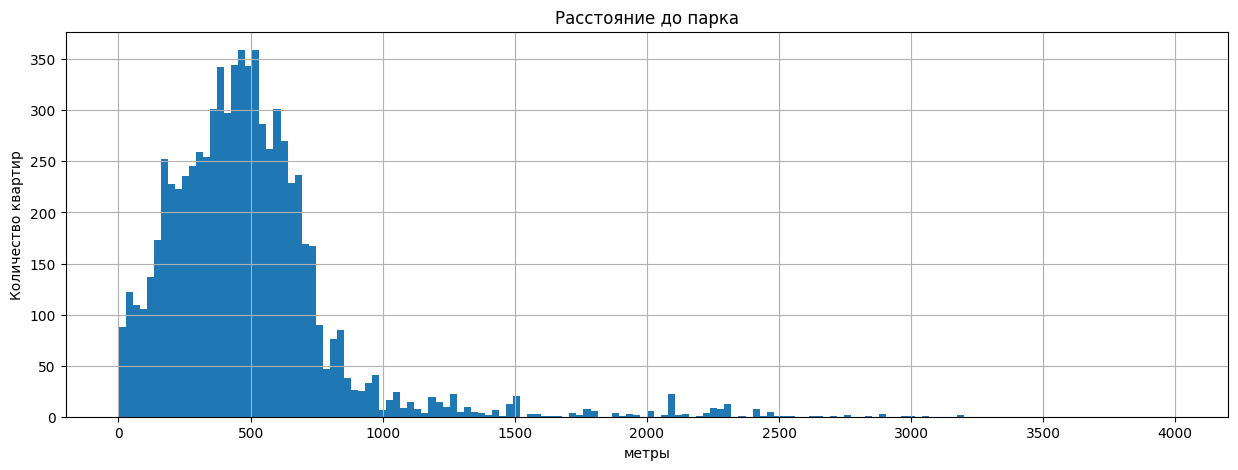

count    7512.000000
mean      492.341454
std       339.381888
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [87]:
df['parks_nearest'].hist(bins=150, range=(0, 4000), figsize=(15, 5))
plt.title('Расстояние до парка')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.show()
df['parks_nearest'].describe()

В шаговой доступности у большинства квартир имеется парк - в среднем до него меньше 500 м.

#### день и месяц публикации объявления

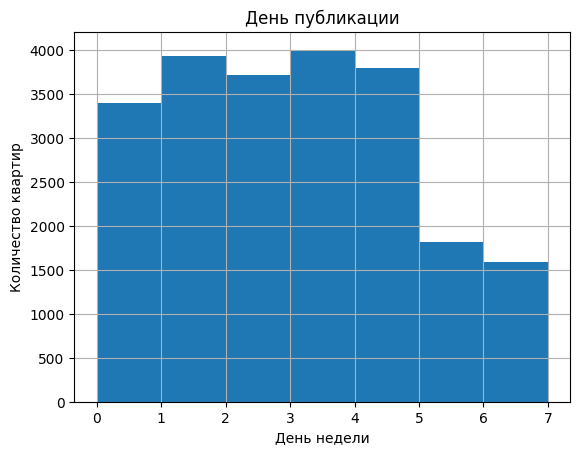

In [88]:
df['weekday'].hist(bins=7, range=(0, 7))
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

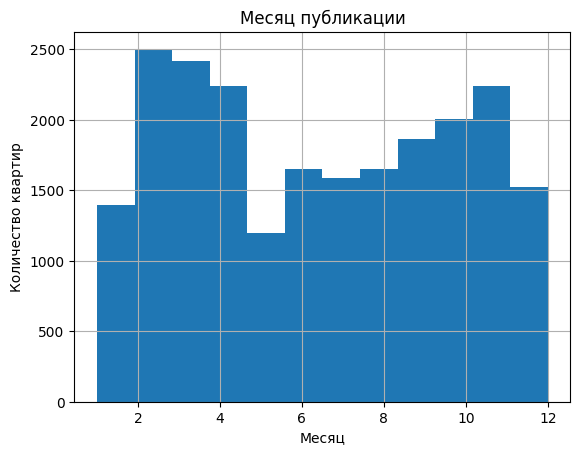

In [89]:
df['month'].hist(bins=12, range=(1, 12))
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Объявления публиковались чаще всего по будням. Месяцы, когда чаще всего публиковались объявления - с Февраля по Апрель и в Ноябре.

### Как быстро продавались квартиры

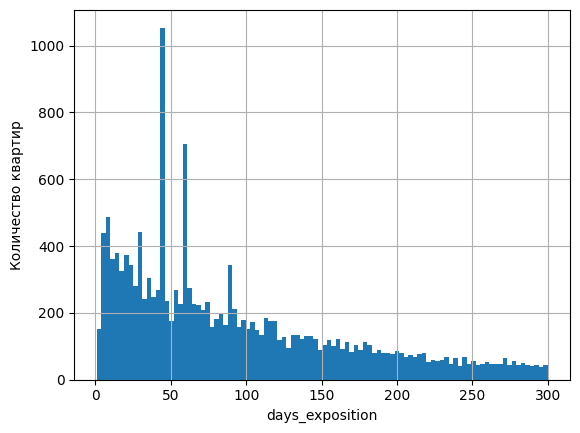

count    19268.000000
mean       166.282333
std        186.761870
min          3.000000
25%         44.000000
50%         92.000000
75%        219.000000
max        999.000000
Name: days_exposition, dtype: float64

In [90]:
df['days_exposition'].hist(bins=100, range=(1, 300))
plt.xlabel('days_exposition')
plt.ylabel('Количество квартир')
plt.show()
df['days_exposition']. describe()

В среднем время продажи квартиры - 3 месяца. Если квартира была продана до 45 дней, можно считать, что ее продали быстро. Также интересно, что есть пики примерно в 45, 60 и 90 дней. Наверное, это как-то связано с работой самого сервиса.

### Факторы, влияющие на стоимость объекта

#### зависимость цены от площади квартиры

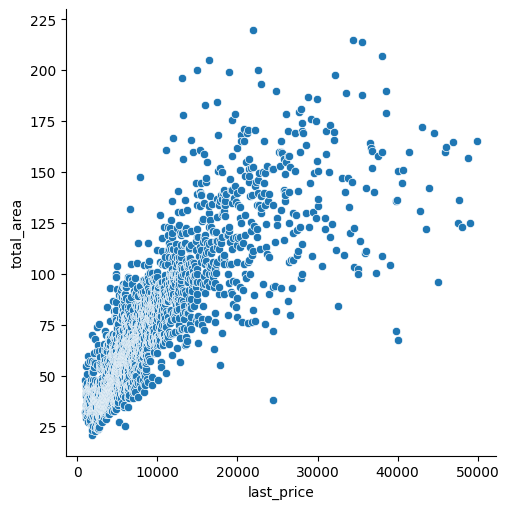

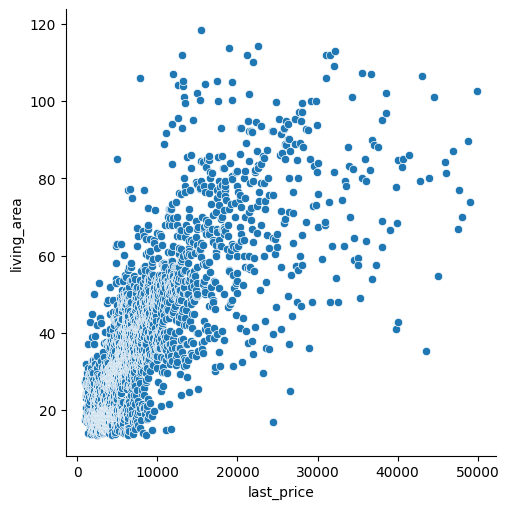

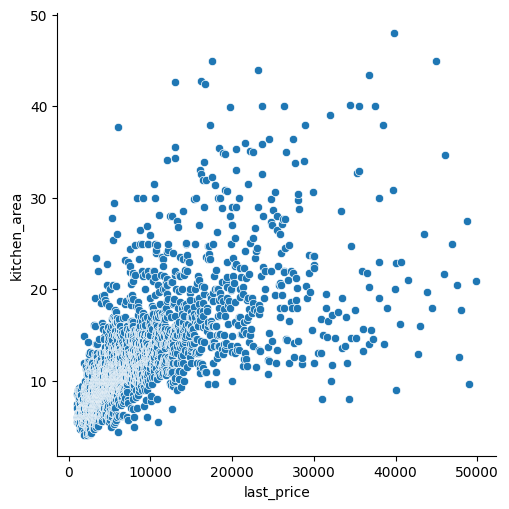

In [91]:
price_pivot_area = df.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()

# Посмотрим на диаграммы рассеяния 
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

#### зависимость цены от количества комнат

0.46075006642434374

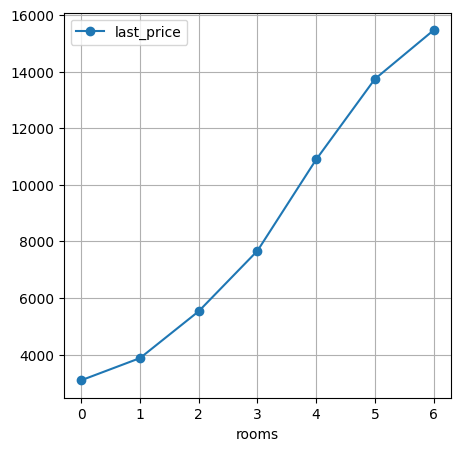

In [92]:
df.query('rooms<7').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
df['rooms'].corr(df['last_price'])

Логично, чем больше комнат, тем выше цена. Однако, корреляция всего лишь 0,36. Вероятно, площадь комнат может быть разной. Это могут быть много маленьких комнат, или одна-две, но большие.

#### зависимость цены от этажа, на котором расположена квартиры

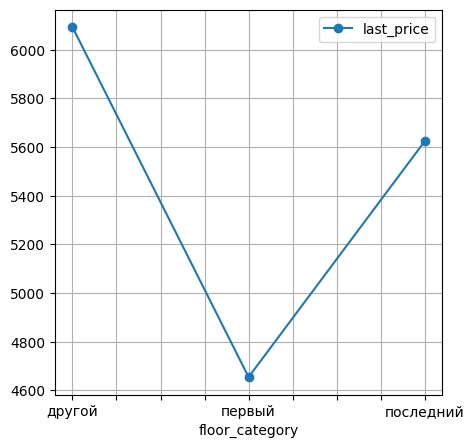

In [93]:
df.pivot_table(index='floor_category', values='last_price').plot(grid=True, style='o-', figsize=(5, 5));

На первых этажах располагаются самые дешевые квартиры. Чем выше, тем дороже.

#### зависимость цены от даты размещения объявления

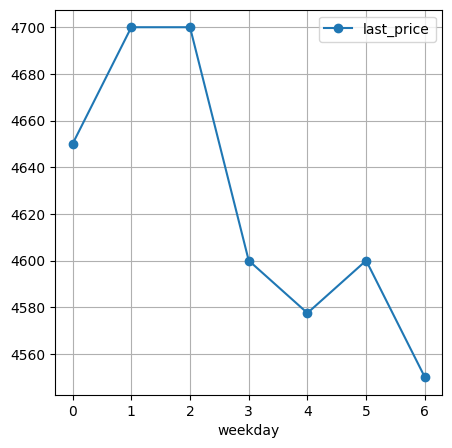

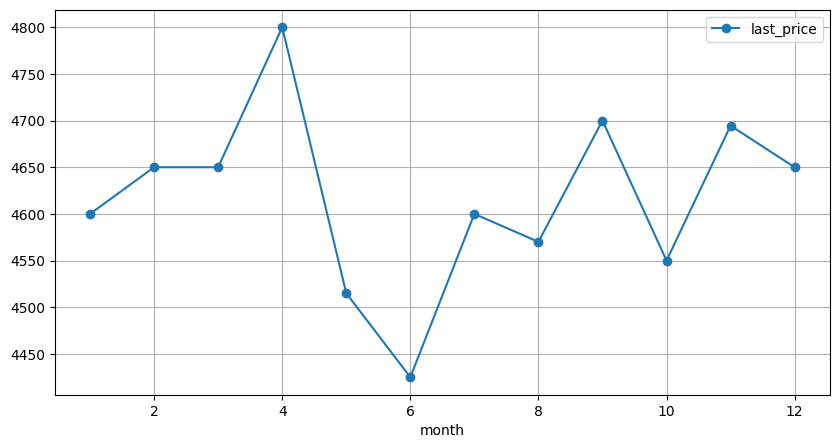

In [94]:
# день недели
df.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5));

# месяц
df.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(10, 5));

Самые дорогие квартиры продавались во вторник, самые дешевые в воскресенье. По месяцам самым дорогим оказался апрель, а дешевым июль. Заметно резкое снижение цен на квартиры с 2014 года, и небольшой подъем с 2018.

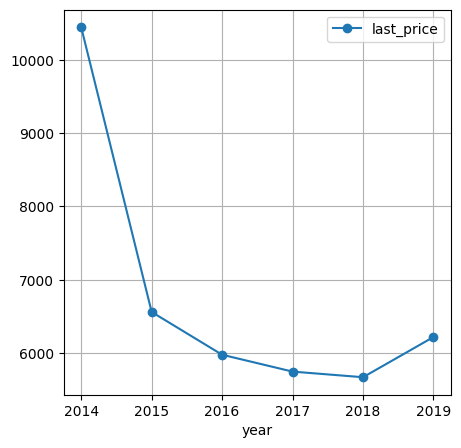

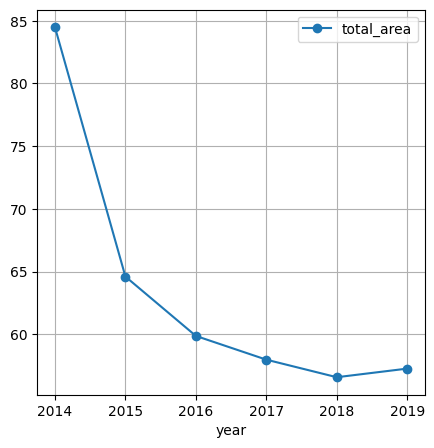

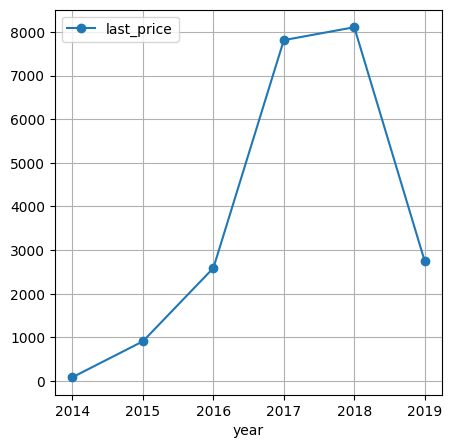

In [95]:
# год
# изменение цены
(
df.pivot_table(index='year', values='last_price', aggfunc='mean')
    .plot(grid=True, style='o-', figsize=(5, 5))
);
# иземение среднией площади
(
df.pivot_table(index='year', values='total_area', aggfunc='mean')
    .plot(grid=True, style='o-', figsize=(5, 5))
);
# изменение количества публикаций
(
df.pivot_table(index='year', values='last_price', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(5, 5))
);

С 2014 по 2019 год средняя цена на недвижимость и общая площадь изменялись практически прямо пропроционально. Количество объявлений резко возрасло в 2017-2018 гг, когда цена на квартиры была минимальной.

### Цена за один квадратный метр

In [96]:
# создадим таблицу, которая будет отражать среднюю стоимость за квадратный метр
table_price_per_m2 = df.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'mean'])
table_price_per_m2.columns = ['Количество', 'Средняя цена']

# затем отсортируем, чтобы вывести топ-10 квартир по количеству объявлений
table_price_per_m2 = table_price_per_m2.sort_values('Количество', ascending=False).head(10)

# и выведем на экран таблицу, отсортированную по убыванию цены
table_price_per_m2.sort_values('Средняя цена', ascending=False).style.format('{:,.0f}')

,Количество,Средняя цена
locality_name,,
Санкт-Петербург,"14,846",112
Пушкин,350,103
деревня Кудрово,285,92
поселок Парголово,312,90
поселок Мурино,521,85
поселок Шушары,421,78
Колпино,331,75
Гатчина,305,69
Всеволожск,384,69


Самая высокая стоимость одного квадратного метра в топ-10 населенных пунктов по количеству объявлений в Санкт-Петербурге, самая низкая - в Выборге, что меньше в два раза. 

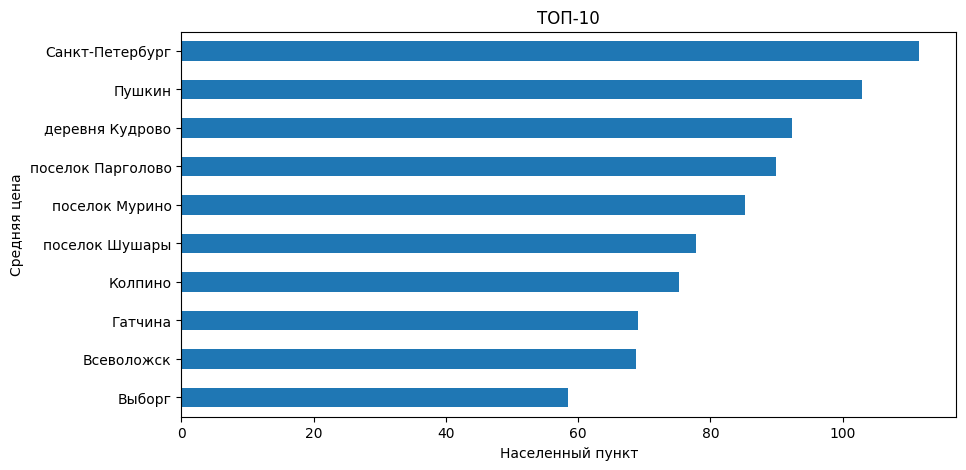

In [97]:
(
table_price_per_m2['Средняя цена'].sort_values()
    .plot(kind='barh', figsize=(10, 5))
)
plt.title('ТОП-10')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена')
plt.show()

### Цена за один километр

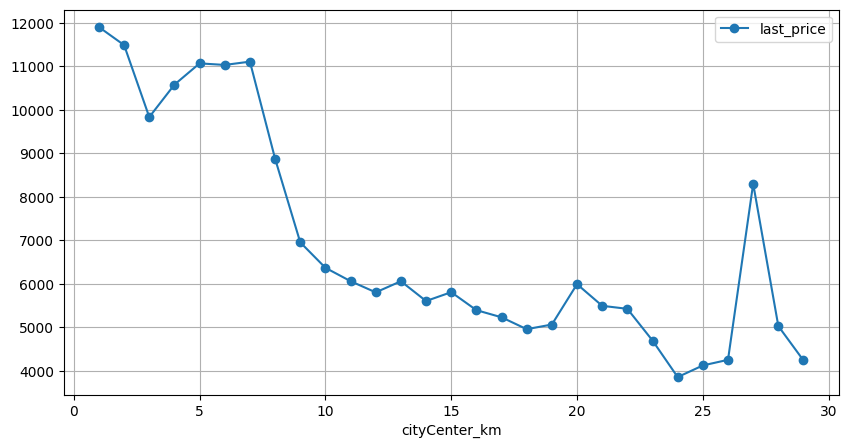

In [98]:
# отфильтруем те буликации, что о продажи квартиры в СПб
spb = df.query("('Санкт-Петербург' in locality_name) and (cityCenter_km != 0)")

# создадим таблицу со средней ценой за километр и на основе нее построим график
spb.pivot_table(index='cityCenter_km', values='last_price', aggfunc='mean').plot(grid=True, style='o-', figsize=(10, 5));

Самый центр Питера - примерно 6-7 км. За этим рубежом происходит резкое снижение цен на жилье. Есть спад в радиусе центра. Возможно это связано с тем, что в центральной части нет новых зданий и из-за условий и состояния жилья приходится занижать цену.

Изучим записи, которые привели к выбросу на 27 км

In [99]:
spb.query('cityCenter_km==27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,price_per_m2,weekday,month,year,cityCenter_km,floor_category
748,13,14350.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0,NaN,128.0,Санкт-Петербург,193.92,1,11,2017,27.0,другой
5961,6,2250.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0,NaN,178.0,Санкт-Петербург,70.31,1,2,2018,27.0,последний


Не вижу никаких зацепок, почему возник выброс на 27 км. Вообще такое расстояние от центра может уже не быть в пределах Питера, хотя так отмечено в таблице. У нас всего две записи, отвергаем данное наблюдение.

## Итоговый вывод

В ходе исследования была выполнена предобработка данных: обработка пропусков, дубликатов и аномальных значений, заменены типы данных. И проведен ИАД: проанализированы основные параметры объектов.

Профиль стандартной квартиры на продажу в районе СПБ и ЛО:

* площадь квартиры от 40 до 69 м² (из них жилая примерно 30 м², площадь кухни - 9 м²), с высотой потолков 2,6 м
* двух- или трехкомнатная квартира, расположенная ниже 5 этажа в 5 этажном доме не в новостройке
* расположение на окраинной части Питера (в его пределах, но далеко от центра)
* достаточно далеко от аэропорта, в пешей доступности есть парк
* цена около 5 млн рублей

Что удалось выяснить в результате исследования:

1. Скорость продажи квартир - примерно 3 месяца.

2. Главный фактор, влияющий на стоимость квартиры - общая площадь. Цена также зависит от этажа, на котором расположена квартира - первый этаж самый дешевый. Основные дни, когда велись продажи это будни, особено во вторник квартиры стоили дороже, а в воскресенье наоборот дешевле. Пик продаж приходится на апрель, а спад на июль.

3. Самая высокая стоимость одного квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.

4. Цена на квартиры начинают снижаться за 6 км от центра.